In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [ ]:
titanic = pd.read_csv('/content/drive/MyDrive/YapayZekaUzmanı/veribilimiders/ders_2/titanic.csv')


Shape komutunu kullanın, veri kümesindeki satır/örnek/örnek sayısını ve sütun veya özellik sayısını verecektir. Gördüğünüz gibi Titanic veri setinde 12 özellik ve 891 kayıt var.

In [ ]:
titanic.shape

(891, 12)

Şimdi veri kümesindeki sayısal sütunlarla ilgili istatistiksel bilgileri görmek için Tanımla yöntemini kullanın.


In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Dikkat; sütunlarda eksik değer olup olmadığını count'tan kontrol edebilirsiniz; burada yaş eksik değerlere sahipken
diğerleri 891'dir.

Başka bir keşif yöntemi bilgisi, her sütundaki toplam değerler, boş/değil gibi veri kümesi hakkında bilgi sağlar
null, veri türü, bellek dolu vb.


dataframe.head(n) komutu veri kümemizde ki ilk n satırı gösterir. Veri kümesinin genel bilgisini elde etmek için, ‘Pandas’ kütüphanesinin ‘info( )’ metodunu kullanabiliriz. Bu fonksiyon, satır ve sütun sayısını ve ayrıca her sütunun veri türünü döndürür.

In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Herhangi bir analiz yapmadan önce verileri açıkça anlamak gerekir. Veri çeşitli türlere sahiptir. ‘Object’, ‘float’, ‘int’, ‘DataTime’ gibi. Veri türlerini kontrol etmeliyiz.

Eksik değerleri olan başka sütun olup olmadığına bakalım.

In [ ]:
null_columns = titanic.columns[titanic.isnull().any()]
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Embarked ve kabinde bile eksik değerlerin olduğunu görüyoruz.

Yaş ile hayatta kalma oranı arasındaki ilişkiyi aşağıdaki grafikte görebiliriz.

Text(0.5, 1.0, 'Age wrt Survived')

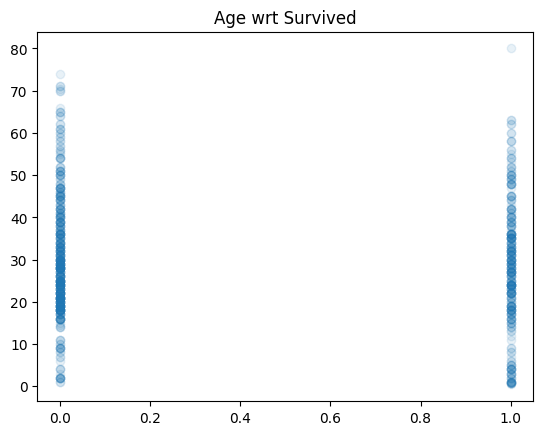

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(titanic.Survived, titanic.Age, alpha = 0.1)
plt.title('Age wrt Survived')

Dolayısıyla yukarıdan, yaşlıların bir kısmının öldüğünü (50-70 arası), gençlerin bir kısmının da (20-40 arası) daha fazla hayatta kaldığını anlıyoruz.


Histogram grafiği, özelliklerin olasılık dağılımını hızlı bir şekilde değerlendirmek için harika bir araçtır. Tüm değişkenlerin dağılımlarını görmek için aşağıdaki kodu kullanın.

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

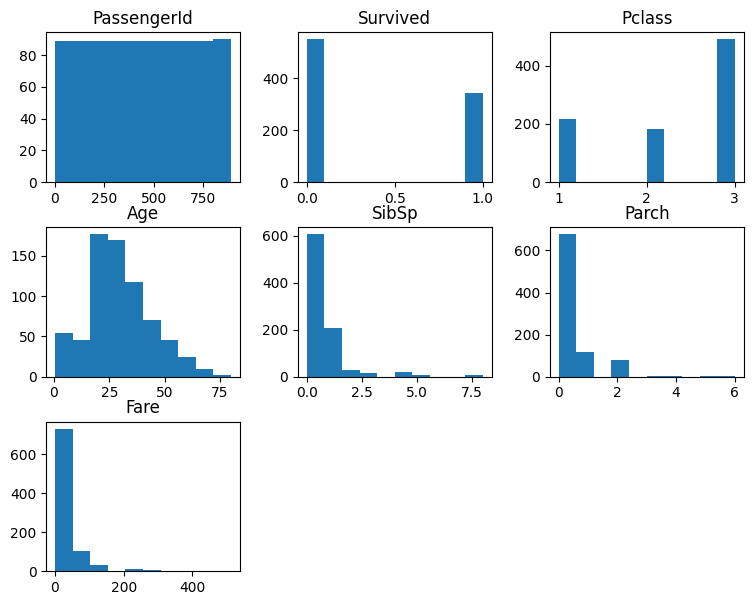

In [ ]:
titanic.hist(bins= 10, figsize= (9,7), grid=False)

Cinsiyete göre hayatta kalma oranını görmek için aşağıdaki histogramları üretebiliriz.

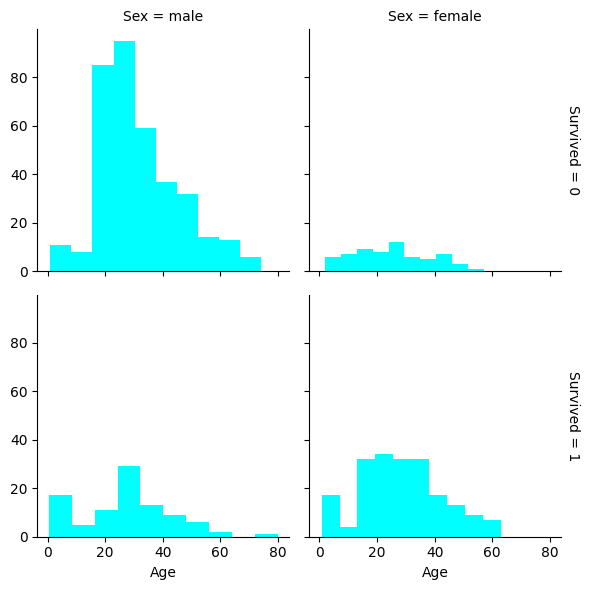

In [ ]:
import seaborn as sns

g = sns.FacetGrid(titanic, col='Sex', row='Survived' ,margin_titles=True)
g.map(plt.hist, 'Age', color='cyan')

Kayıtları birden fazla eksende haritalamak için kullanılan Facetgrid grafiği aracılığıyla başka bir karmaşık analiz gerçekleştirilebilir. Burada yolcuların hayatta kalması, farklı yolcu sınıfları için Yaş ve Ücret ilişkileriyle temsil edilmektedir.

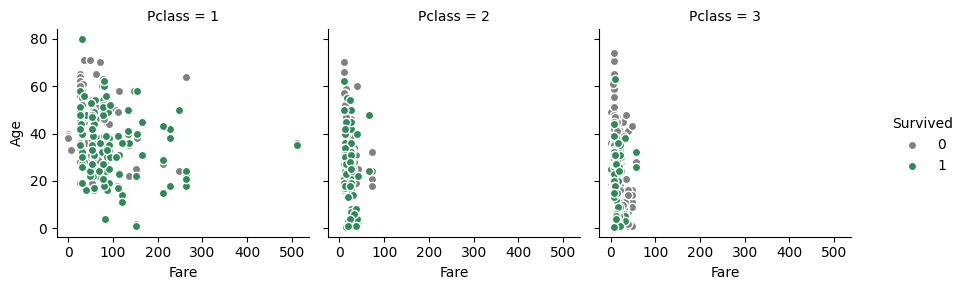

In [ ]:
g = sns.FacetGrid(titanic, hue='Survived', col='Pclass', margin_titles=True, palette = {1:'seagreen', 0:'gray'})
g = g.map(plt.scatter, 'Fare', 'Age' , edgecolor = 'w').add_legend()

Benzer analiz üç özellik üzerinde gerçekleştirilebilir. Aşağıdaki komut dosyası hayatta kalma oranının Cinsiyet, Yaş ve Ücret üzerindeki ilişkisini göstermek için kullanılır.

Text(0.5, 0.98, 'survived by gender, age and fare')

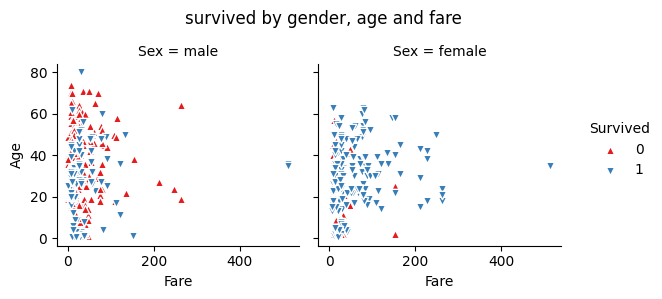

In [ ]:
g = sns.FacetGrid(titanic, hue='Survived', col='Sex', margin_titles = True,
                  palette = 'Set1' , hue_kws=dict(marker=['^', 'v']))

g.map(plt.scatter, 'Fare', 'Age', edgecolor = 'w').add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle('survived by gender, age and fare')